<a href="https://colab.research.google.com/github/fouziasharkar/Programming-and-Systems-Development-/blob/main/Pytorch_Exercise_Sheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.__version__)

2.8.0+cu126


In [ ]:
import torch.nn as nn

# **Task-1**

## **PyTorch Regression (MSELoss + Adam)**

In this practical exercise, you will build and train a simple regression model using PyTorch. You will learn how to define a neural network, generate synthetic data, use MSELoss, and train the model using the Adam optimizer.


**Instructions Step 1:** Data Generation
Import torch.
Generate feature data X with 120 samples and 8 features:
   X = torch.randn(120, 8)

**Create a learnable target using the formula:**

y = X @ w + b + noise, where w (8×1) and b are constants, and noise ~ N(0, 0.5).

Print X.shape and y.shape to confirm dimensions.

**Step 2: Model Definition**
Define a neural network class called RevenueNet that extends torch.nn.Module.
Include three layers:
   - Input: 8 neurons
   - Hidden: 16 → 8 neurons (ReLU activation)
   - Output: 1 neuron (no activation)

Print the model architecture after initialization.

**Step 3: Model Setup**
Instantiate your RevenueNet model.
Use torch.nn.MSELoss() as your loss function.
Use the Adam optimizer with a learning rate of 0.010.

**Step 4: Training Loop**

Train the model for 30 epochs.

For each epoch:

   Compute predictions with model(X).

   Calculate loss using the MSELoss criterion.

   Zero the gradients, perform backpropagation, and update model weights.

Print loss after each epoch in the format:
Epoch 01 | Loss: 0.123456

**Step 5: Loss Visualisation**
Use matplotlib to plot the recorded training loss across epochs. Label axes and provide a title. Display the chart with plt.show().


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Data
# Generate 120 samples with 8 features each
X = torch.randn(120, 8)

# Define true weights and bias
w = torch.randn(8, 1)
b = torch.randn(1)

# Add random noise (mean=0, std=0.5)
noise = torch.randn(120, 1) * 0.5

# True relationship: y = Xw + b + noise
y = X @ w + b + noise

print(X.shape, y.shape)  # should be torch.Size([120, 8]) torch.Size([120, 1])

torch.Size([120, 8]) torch.Size([120, 1])


In [ ]:
class RevenueNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 16)   # Input layer: 8 → 16
        self.fc2 = nn.Linear(16, 8)   # Hidden layer: 16 → 8
        self.fc3 = nn.Linear(8, 1)    # Output layer: 8 → 1
        self.relu = nn.ReLU()         # Activation for hidden layers

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)               # No activation for regression
        return x

model = RevenueNet()
print(model)

RevenueNet(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
#loss
criterion = nn.MSELoss()                      # measures how wrong predictions are
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Train Model
epochs = 30
loss_values = []

for epoch in range(1, epochs + 1):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward + Optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record & print loss
    loss_values.append(loss.item())
    print(f"Epoch {epoch:02d} | Loss: {loss.item():.6f}")

Epoch 01 | Loss: 14.463102
Epoch 02 | Loss: 14.290032
Epoch 03 | Loss: 14.102554
Epoch 04 | Loss: 13.895903
Epoch 05 | Loss: 13.665375
Epoch 06 | Loss: 13.406363
Epoch 07 | Loss: 13.117813
Epoch 08 | Loss: 12.798800
Epoch 09 | Loss: 12.443455
Epoch 10 | Loss: 12.045597
Epoch 11 | Loss: 11.606129
Epoch 12 | Loss: 11.119975
Epoch 13 | Loss: 10.591763
Epoch 14 | Loss: 10.026587
Epoch 15 | Loss: 9.428883
Epoch 16 | Loss: 8.802760
Epoch 17 | Loss: 8.155734
Epoch 18 | Loss: 7.501103
Epoch 19 | Loss: 6.853632
Epoch 20 | Loss: 6.229462
Epoch 21 | Loss: 5.658088
Epoch 22 | Loss: 5.157140
Epoch 23 | Loss: 4.746015
Epoch 24 | Loss: 4.435935
Epoch 25 | Loss: 4.224885
Epoch 26 | Loss: 4.093893
Epoch 27 | Loss: 4.011970
Epoch 28 | Loss: 3.928663
Epoch 29 | Loss: 3.813957
Epoch 30 | Loss: 3.652200


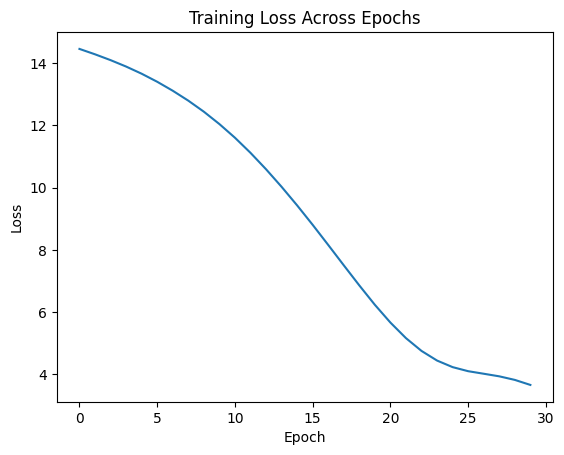

In [ ]:
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Across Epochs')
plt.show()

**Reflection Questions**

Answer these questions after completing the exercise:

1)	What does a decreasing MSE loss tell you about your model’s learning process?
2)	What happens if you increase the learning rate to 0.1? Why?
3)	How does adding more noise to your target (y) affect training performance?
4)	Why is MSELoss appropriate for regression problems instead of BCELoss?
5)	In what real-world cybersecurity scenario might regression modelling be used?


In [ ]:
# 1. A decreasing MSE loss indicates the model is learning and improving its fit to the data.

In [ ]:
"""
If you increase the learning rate too much (e.g., from 0.01 → 0.1),
your model might learn too fast and overshoot the optimal values.

That means:
The loss could fluctuate wildly or even diverge (increase instead of decrease).
The optimizer makes big, unstable jumps in parameter space rather than small, steady improvements.

📘 In short:
A higher learning rate can make training unstable and prevent convergence, while
a small rate ensures smooth, gradual learning.

"""

'\nIf you increase the learning rate too much (e.g., from 0.01 → 0.1),\nyour model might learn too fast and overshoot the optimal values.\n\nThat means:\nThe loss could fluctuate wildly or even diverge (increase instead of decrease).\nThe optimizer makes big, unstable jumps in parameter space rather than small, steady improvements.\n\n📘 In short:\nA higher learning rate can make training unstable and prevent convergence, while \na small rate ensures smooth, gradual learning.\n\n'

In [ ]:
# 3. More noise = harder learning, slower convergence, and lower accuracy.

In [ ]:
"""
MSELoss measures the average squared difference between predicted continuous
values and actual continuous targets — ideal for regression.

BCELoss (Binary Cross-Entropy), on the other hand, is used for binary
classification problems where outputs are probabilities (0–1).

📘 In short:
MSELoss = continuous numerical prediction
BCELoss = binary (0/1) classification

So for predicting quantities like revenue, price, or risk scores → use MSELoss.

"""

'\nMSELoss measures the average squared difference between predicted continuous \nvalues and actual continuous targets — ideal for regression.\n\nBCELoss (Binary Cross-Entropy), on the other hand, is used for binary \nclassification problems where outputs are probabilities (0–1).\n\n📘 In short:\nMSELoss = continuous numerical prediction\nBCELoss = binary (0/1) classification\n\nSo for predicting quantities like revenue, price, or risk scores → use MSELoss.\n\n'

In [ ]:
"""
Regression can be used in cybersecurity to predict continuous risk levels or
anomaly scores — not just classify attacks.

Examples:
Predicting the likelihood or severity of a data breach based on system logs.
Estimating response time to detect an intrusion based on network load.

Modelling the expected financial loss from a cyberattack.

📘 In short:
Regression helps cybersecurity analysts forecast risk levels,
costs, or impact scores — enabling proactive defense strategies.

"""

'\nRegression can be used in cybersecurity to predict continuous risk levels or \nanomaly scores — not just classify attacks.\n\nExamples:\nPredicting the likelihood or severity of a data breach based on system logs.\nEstimating response time to detect an intrusion based on network load.\n\nModelling the expected financial loss from a cyberattack.\n\n📘 In short:\nRegression helps cybersecurity analysts forecast risk levels, \ncosts, or impact scores — enabling proactive defense strategies.\n\n'

# **Task-2**

## **PyTorch Classification (BCELoss + SGD)**
In this practical exercise, you will build and train a small binary classification model using PyTorch. You will learn how to define a neural network, generate synthetic binary labels (a learnable target), use BCELoss for classification, and train the model with the SGD optimizer.


**Instructions Step 1:** Data Generation (Learnable Binary Target)

1)	Import torch.
2)	Generate input features X with 200 samples and 4 features:
   X = torch.randn(200, 4)
3)	Create a learnable binary target using a noisy logistic model:

   w = torch.tensor([[0.8],[0.6],[0.7],[0.5]])

   b = torch.tensor([-1.0])

   noise = 0.3 * torch.randn(200, 1)

   proba = torch.sigmoid(X @ w + b + noise)  # values in (0, 1)

   y = (proba > 0.5).float()                 # binary
   
   labels (0/1), shape (200,1)

4)	Print the shapes of X and y to confirm dimensions.

**Step 2: Model Definition (RiskNN)**

1.	Define a neural network class RiskNN that extends torch.nn.Module.

2. Architecture:
   - Input Layer: 4 neurons
   - Hidden Layer: 8 neurons with ReLU activation
   - Output Layer: 1 neuron with Sigmoid activation

3. Implement forward(self, x) to return the network output.

**Step 3: Model Setup (BCELoss + SGD)**

1. Instantiate the RiskNN model.
2. Use torch.nn.BCELoss() as the loss function.
3. Use torch.optim.SGD as the optimizer with a learning rate of 0.05.
4. Print the model architecture to verify the layers.

**Step 4: Training Loop**
1. Train the model for 15 epochs.
2. For each epoch:
   - Compute predictions: preds = model(X)
   - Compute loss: loss = criterion(preds, y)
   - Zero gradients, backpropagate, and step the optimizer.
3. Record and print the loss each epoch in the format:
   Epoch 01: loss=0.6931

**Step 5: Loss Visualisation**
Use matplotlib to plot the recorded training loss across epochs. Label axes and provide a title. Display the chart with plt.show().


In [ ]:
#Generate input features X with 200 samples and 4 features
X = torch.randn(200, 4)

In [ ]:
# Create a learnable binary target using a noisy logistic model:

w = torch.tensor([[0.8],[0.6],[0.7],[0.5]])

b = torch.tensor([-1.0])

noise = 0.3 * torch.randn(200, 1)

proba = torch.sigmoid(X @ w + b + noise) # values in (0, 1)

y = (proba > 0.5).float() # binary

print('x:', X.shape)
print('y:', y.shape)

x: torch.Size([200, 4])
y: torch.Size([200, 1])


In [ ]:
#Model Definition
class RiskNN(nn.Module):
    def __init__(self):
        super(RiskNN, self).__init__()
        self.fc1 = nn.Linear(4, 8)  # Input layer
        self.fc2 = nn.Linear(8, 1)   # Hidden layer


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))

        return x

# Instantiate the network
model = RiskNN()
print(model)

RiskNN(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
#Model Setup (BCELoss + SGD)
criterion = torch.nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

In [ ]:
#Training Loop
losses = []
for epoch in range(1, 16):
    preds = model(X)                  # Forward pass
    loss = criterion(preds, y)        # Compute loss

    optimizer.zero_grad()             # Clear previous gradients
    loss.backward()                   # Backpropagation
    optimizer.step()                  # Update weights
    losses.append(loss.item())
    print(f"Epoch {epoch:02d}: loss={loss.item():.4f}")

Epoch 01: loss=0.7787
Epoch 02: loss=0.7720
Epoch 03: loss=0.7655
Epoch 04: loss=0.7592
Epoch 05: loss=0.7532
Epoch 06: loss=0.7474
Epoch 07: loss=0.7419
Epoch 08: loss=0.7365
Epoch 09: loss=0.7313
Epoch 10: loss=0.7263
Epoch 11: loss=0.7215
Epoch 12: loss=0.7168
Epoch 13: loss=0.7123
Epoch 14: loss=0.7079
Epoch 15: loss=0.7037


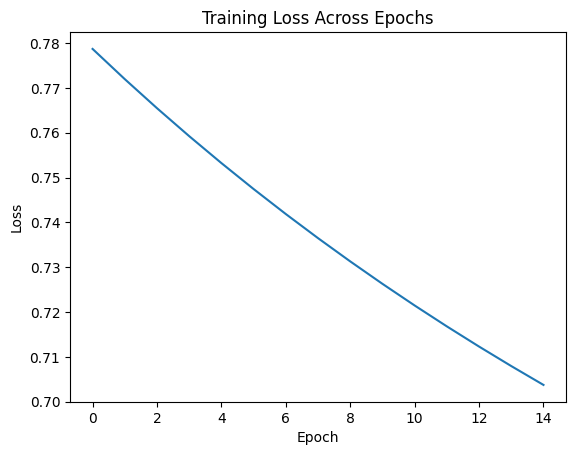

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Across Epochs")
plt.show()

1) Why is BCELoss appropriate for this task, and when would you prefer MSELoss instead?
2) What happens to learning if you remove the Sigmoid from the output layer while still using BCELoss?
3) How does increasing the learning rate for SGD (e.g., to 0.2) affect convergence and stability?
4) How does increasing the noise in label generation change the loss curve and final performance?
5) If classes become imbalanced (e.g., 90% of labels are 0), what changes could you make to the loss or data generation to address this?


In [ ]:
"""
That breaks the math behind BCELoss.

Here’s why:

BCELoss expects probabilities between 0 and 1.
Without Sigmoid, your model outputs raw scores (logits) — which can be any number (negative or positive).
So, BCELoss will get invalid inputs (e.g., -2.4, 3.8) and produce unstable or exploding losses.

As a result:
The loss may not decrease properly,
Gradients might blow up or vanish,
The model may fail to learn.

"""

In [ ]:
"""A very high learning rate makes the
optimizer take too large steps when updating weights.

Result:
The loss may oscillate instead of steadily decreasing,
The model may fail to converge or even diverge (loss goes up).

At moderate rates (e.g., 0.01 or 0.05), SGD converges slowly but smoothly.
At 0.2, steps are so big that it “jumps” over the minimum repeatedly.

📘 In short:
A higher learning rate speeds up learning at first but often
destabilizes convergence and hurts final accuracy.

"""

In [ ]:
"""
Option 1: Weighted loss
Use BCEWithLogitsLoss(pos_weight=...)
to give more importance to the minority class (1s).

Option 2: Resample the datap[;'/]
Oversample minority class (duplicate 1s)
Undersample majority class (remove some 0s)

Option 3: Synthetic data
Generate balanced data when creating
labels so that the number of 0s and 1s is roughly equal.

📘 In short:
Handle imbalance by using weighted loss or balancing
your dataset so both classes contribute equally to learning.


"""

# **2024-2025 exam paper question**

## **Regression**

Epoch 01: Loss = 0.0564
Epoch 02: Loss = 0.0564
Epoch 03: Loss = 0.0563
Epoch 04: Loss = 0.0563
Epoch 05: Loss = 0.0563
Epoch 06: Loss = 0.0562
Epoch 07: Loss = 0.0562
Epoch 08: Loss = 0.0561
Epoch 09: Loss = 0.0561
Epoch 10: Loss = 0.0561
Epoch 11: Loss = 0.0560
Epoch 12: Loss = 0.0560
Epoch 13: Loss = 0.0559
Epoch 14: Loss = 0.0559
Epoch 15: Loss = 0.0559
Epoch 16: Loss = 0.0558
Epoch 17: Loss = 0.0558
Epoch 18: Loss = 0.0558
Epoch 19: Loss = 0.0557
Epoch 20: Loss = 0.0557


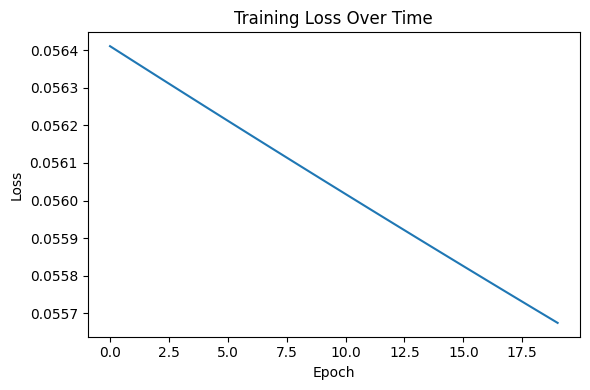

In [ ]:
# --- Task 3: Basic Neural Network Implementation ---

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ---------------- Task 3a: Model Definition ----------------
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 5)   # Input → Hidden1
        self.fc2 = nn.Linear(5, 3)    # Hidden1 → Hidden2
        self.fc3 = nn.Linear(3, 1)    # Hidden2 → Output
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))   # Sigmoid output
        return x

# Initialize model, loss, optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# ---------------- Task 3b: Data Generation ----------------
torch.manual_seed(0)                   # 🔒 reproducible -> to always have the same result
x = torch.randn(100, 10)               # 100 samples × 10 features
y = torch.randn(100, 1)
y = (y - y.min()) / (y.max() - y.min())  # normalize 0–1 for Sigmoid

# ---------------- Task 3c: Training ----------------
losses = []
for epoch in range(1, 21):
    preds = model(x)
    loss = criterion(preds, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    print(f"Epoch {epoch:02d}: Loss = {loss.item():.4f}")

# ---------------- Task 3d: Loss Visualization ----------------
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.title("Training Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

# **Chatgpt Problems**

## **Task-1**

### **Regression**

Define a simple neural network in PyTorch named MiniNet with the following structure:

**Input:** 6 features

**Hidden Layer 1:** 4 neurons, ReLU activation

**Output Layer:** 1 neuron, no activation

**Then:**

1) Instantiate the model.

2) Print the total number of trainable parameters.

Reflection:
Explain in 1–2 lines — why would you not use a Sigmoid activation in the output layer for a regression problem?

In [ ]:
class MiniNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(6, 4)   # Input → Hidden1
        self.fc2 = nn.Linear(4, 1)    # Hidden1 → Hidden2
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)               # no activation
        return x



model = MiniNet()
print(model)


# Count trainable parameters (step by step)
total_params = 0
for i in model.parameters():
    if i.requires_grad:                 # Only count trainable parameters
        print(i.shape, i.numel())       # Returns the number of elements in
                                        # that tensor (for example, how many weights or biases it contains
        total_params += i.numel()       # Add up all numbers

print("Total trainable parameters:", total_params)

MiniNet(
  (fc1): Linear(in_features=6, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)
torch.Size([4, 6]) 24
torch.Size([4]) 4
torch.Size([1, 4]) 4
torch.Size([1]) 1
Total trainable parameters: 33


## **Task-2**

### **Binary Classification**

You are training a simple neural network for binary classification using BCELoss and SGD.

Define a network class called RiskNN with:

**Input Layer:** 5 input features

**Hidden layer 1:** 10 neurons, ReLU activation

**Hidden layer 2:** 5 neurons, ReLU activation

**Output layer:** 1 neuron, no activation

**Then:**

1) Print all layer names and their parameter shapes.

2) Print only the weights of the second hidden layer.

In [ ]:
#Model Definition
class RiskNN(nn.Module):
    def __init__(self):
        super(RiskNN, self).__init__()
        self.fc1 = nn.Linear(5, 10)  # Input layer
        self.fc2 = nn.Linear(10, 5)   # Hidden layer
        self.fc3 = nn.Linear(5, 1)    # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)               # No activation

        return x

# Instantiate the network
model = RiskNN()
print(model)


# Print all layer names and their parameter shapes
for name, param in model.named_parameters():
    print(name, "has shape", param.shape)


# Print only the weights of the second hidden layer
print("\nWeights of second hidden layer (fc2):")
print(model.fc2.weight)

RiskNN(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
fc1.weight has shape torch.Size([10, 5])
fc1.bias has shape torch.Size([10])
fc2.weight has shape torch.Size([5, 10])
fc2.bias has shape torch.Size([5])
fc3.weight has shape torch.Size([1, 5])
fc3.bias has shape torch.Size([1])

Weights of second hidden layer (fc2):
Parameter containing:
tensor([[-0.0535, -0.1062, -0.1485,  0.2040, -0.1720, -0.0558,  0.1595,  0.0319,
         -0.2661, -0.3144],
        [-0.1537,  0.2917, -0.2248,  0.1743,  0.2264, -0.1311, -0.1396, -0.2275,
          0.0493, -0.0442],
        [ 0.0154,  0.1372,  0.1328, -0.0998,  0.0217,  0.0751,  0.0067,  0.0633,
         -0.1281,  0.2592],
        [-0.0324, -0.0405, -0.2838, -0.2292,  0.0098, -0.0489, -0.1590,  0.1655,
         -0.0283,  0.1112],
        [ 0.2663, -0.1454, -0.1556, -0.0635, -0.0

## **Task-3**

### **Binary Classification**

You are asked to build a simple classification network called SpamDetector to detect whether an email is spam (1) or not (0).

Define the model with this structure:

**Input layer:** 6 features

**Hidden layer:** 3 neurons, ReLU activation

**Output layer:** 1 neuron, Sigmoid activation

Generate random input data and labels:


**X = torch.randn(50, 6)**

**y = torch.randint(0, 2, (50, 1)).float()**

**Use:**

**Loss:** torch.nn.BCELoss()

**Optimizer:** torch.optim.Adam(model.parameters(), lr=0.01)

Train for 5 epochs and print loss each time.

In [ ]:
#y = torch.randint(0, 2, (50, 1)).float()

# -> torch.randint(0, 2, (50, 1))
# -> Creates a tensor of random integers.
# -> The numbers will be between 0 (inclusive) and 2 (exclusive) → so only 0 or 1.
# -> Shape (50, 1) → means 50 rows and 1 column, so you get 50 binary labels.

#.float()
# -> Converts the data type from integer (0 or 1) to float (0.0 or 1.0).

In [ ]:
import torch
import torch.nn as nn

# Step 1: Define the model
class SpamDetector(nn.Module):
    def __init__(self):
        super(SpamDetector, self).__init__()
        self.fc1 = nn.Linear(6, 3)   # Input layer → Hidden layer
        self.fc2 = nn.Linear(3, 1)   # Hidden layer → Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Sigmoid for binary output
        return x

# Step 2: Generate random data
X = torch.randn(50, 6)                 # 50 samples, 6 features
y = torch.randint(0, 2, (50, 1)).float()  # 50 binary labels (0 or 1)

# Step 3: Set up loss and optimizer
model = SpamDetector()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Step 4: Training loop
for epoch in range(1, 6):  # 5 epochs
    # Forward pass
    preds = model(X)
    loss = criterion(preds, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 1: Loss = 0.7292
Epoch 2: Loss = 0.7252
Epoch 3: Loss = 0.7215
Epoch 4: Loss = 0.7182
Epoch 5: Loss = 0.7151
